# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
!pip install keras tensorflow

In [2]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [4]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#建立模型

In [9]:
model = Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.2493 - accuracy: 0.9244 - val_loss: 0.1104 - val_accuracy: 0.9655
Epoch 2/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.1115 - accuracy: 0.9669 - val_loss: 0.1000 - val_accuracy: 0.9720
Epoch 3/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.0780 - accuracy: 0.9766 - val_loss: 0.1075 - val_accuracy: 0.9685
Epoch 4/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.1107 - val_accuracy: 0.9716
Epoch 5/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.1031 - val_accuracy: 0.9737
Epoch 6/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0948 - val_accuracy: 0.9755
Epoch 7/10
48000/48000 [==============================] - 7s 1

# 以圖形顯示訓練過程

In [12]:
print(train_history.history)
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

{'val_loss': [0.11044372684291254, 0.10003365642833524, 0.10750211124261841, 0.11065325609683835, 0.10310390659382877, 0.09476365896326024, 0.11801705139295518, 0.11294243073133112, 0.11997543283338503, 0.11135574029446979], 'val_accuracy': [0.965499997138977, 0.972000002861023, 0.968500018119812, 0.9715833067893982, 0.9737499952316284, 0.9754999876022339, 0.9706666469573975, 0.9741666913032532, 0.9740833044052124, 0.9774166941642761], 'loss': [0.24925893295401086, 0.1115026068422012, 0.0780168902084503, 0.0617023232022766, 0.0511001625470138, 0.04724598909856771, 0.037931733337689365, 0.033038570568220925, 0.029604335974201302, 0.026497396667339218], 'accuracy': [0.924375, 0.9668958, 0.97660416, 0.98064584, 0.985125, 0.98575, 0.9889167, 0.9903333, 0.9909792, 0.99225]}


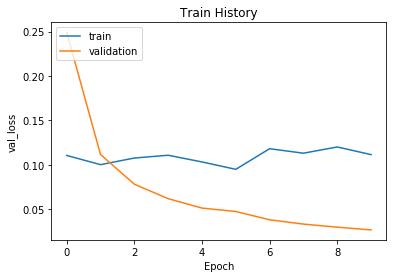

In [13]:
show_train_history(train_history,'val_loss','loss')

In [14]:
#show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 35us/step

accuracy= 0.9800000190734863
